In [1]:
# from array import array
import numpy as np
import matplotlib.pyplot as plt
from edo2 import euler, eulercromer, rungekutta
from lista01 import dominio_rad, poincare
# from pint import UnitRegistry

# un = UnitRegistry()

tamanho_mark = 1
tamanho_plot = (7, 7)


# Lista 1
para 19/09/22

## Exercício 1
$$\frac{d^2 \theta}{d t^2} = - \frac{g}{l} \theta = f(\theta, t)$$
$$\theta(0) = \theta_0$$
$$\omega(0) = \omega_0$$

In [2]:
g = 9.8  # un.m / un.s**2
l = 9.8  # un.m
Omega = np.sqrt(g / l)  # un.rad
T = (2 * np.pi) / Omega  # * un.rad
phi = np.pi / 2  # * un.rad

dt_1 = 0.04

theta_01 = 0.15
omega_01 = 0.0


def pslin(theta, omega, t, g=g, l=l):
    """Funcional do pêndulo simples não-amortecido e não forçado no limite de pequenas oscilações."""
    return - (g / l) * theta


t_1 = np.linspace(0, 5 * T, 1000)
theta_1 = theta_01 * np.sin(Omega * t_1 + phi)
omega_1 = Omega * theta_01 * np.cos(Omega * t_1 + phi)

theta_e1, omega_e1, t_e1 = euler(
    y_0=theta_01,
    v_0=omega_01,
    dt=dt_1,
    t_f=5 * T,
    funcional=pslin
)

theta_ec1, omega_ec1, t_ec1 = eulercromer(
    y_0=theta_01,
    v_0=omega_01,
    dt=dt_1,
    t_f=5 * T,
    funcional=pslin
)

theta_rk1, omega_rk1, t_rk1 = rungekutta(
    y_0=theta_01,
    v_0=omega_01,
    dt=dt_1,
    t_f=5 * T,
    funcional=pslin
)


### 1.(a)

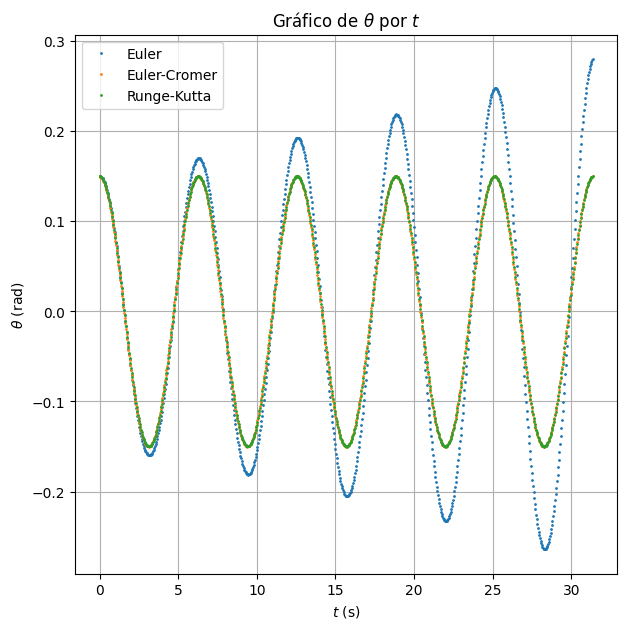

In [3]:
figa, axa = plt.subplots()
axa.plot(t_e1, theta_e1, 'o', markersize=tamanho_mark, label='Euler')
axa.plot(t_ec1, theta_ec1, 'o', markersize=tamanho_mark, label='Euler-Cromer')
axa.plot(t_rk1, theta_rk1, 'o', markersize=tamanho_mark, label='Runge-Kutta')
# axa.plot(t_1, theta_1, '-', color='black', label='Solução analítica')
axa.set_title('Gráfico de $\\theta$ por $t$')
axa.set_xlabel('$t$ (s)')
axa.set_ylabel('$\\theta $ (rad)')
axa.xaxis.grid()
axa.yaxis.grid()
axa.legend()
figa.set_size_inches(tamanho_plot)


### 1.(b)

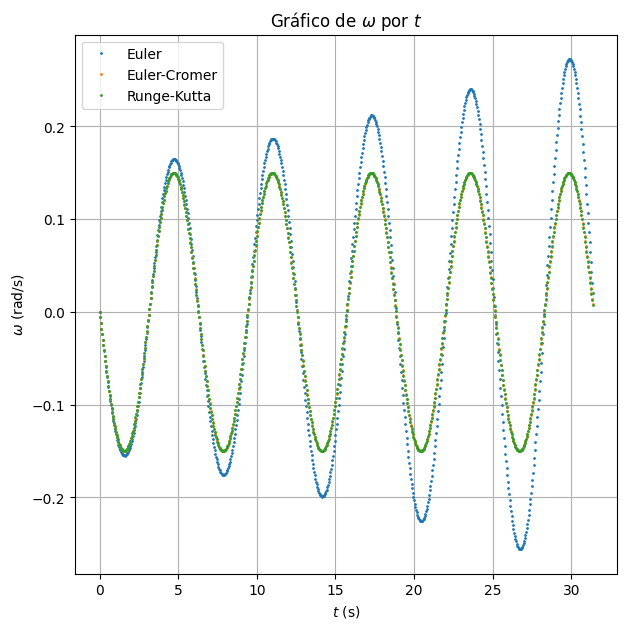

In [4]:
figb, axb = plt.subplots()
axb.plot(t_e1, omega_e1, 'o', markersize=tamanho_mark, label='Euler')
axb.plot(t_ec1, omega_ec1, 'o', markersize=tamanho_mark, label='Euler-Cromer')
axb.plot(t_rk1, omega_rk1, 'o', markersize=tamanho_mark, label='Runge-Kutta')
# axb.plot(t_1, omega_1, '-', color='black', label='Solução analítica')
axb.set_title('Gráfico de $\omega$ por $t$')
axb.set_xlabel('$t$ (s)')
axb.set_ylabel('$\omega $ (rad/s)')
axb.xaxis.grid()
axb.yaxis.grid()
axb.legend()
figb.set_size_inches(tamanho_plot)


### 1.(c)

In [5]:
def Ecinetica1(omega, m=1, l=l):
    """Calcula a energia cinetica a partir das frequencias angulares para um pêndulo."""
    return (1 / 2) * m * l**2 * omega**2


def Epot1(theta, m=1, g=g, l=l):
    """Calcula a energia potencial gravitacional a partir dos ângulos de um pêndulo simples para pequenos ângulos."""
    return (1 / 2) * m * l**2 * (g / l) * theta**2


T_1 = Ecinetica1(omega_1)
T_e1 = Ecinetica1(omega_e1)
T_ec1 = Ecinetica1(omega_ec1)
T_rk1 = Ecinetica1(omega_rk1)

U_1 = Epot1(theta_1)
U_e1 = Epot1(theta_e1)
U_ec1 = Epot1(theta_ec1)
U_rk1 = Ecinetica1(theta_rk1)

E_1 = T_1 + U_1
E_e1 = T_e1 + U_e1
E_ec1 = T_ec1 + U_ec1
E_rk1 = T_rk1 + U_rk1


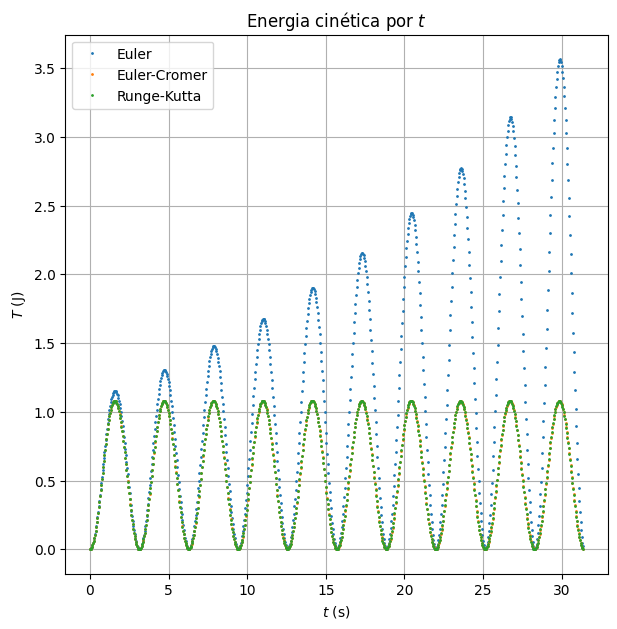

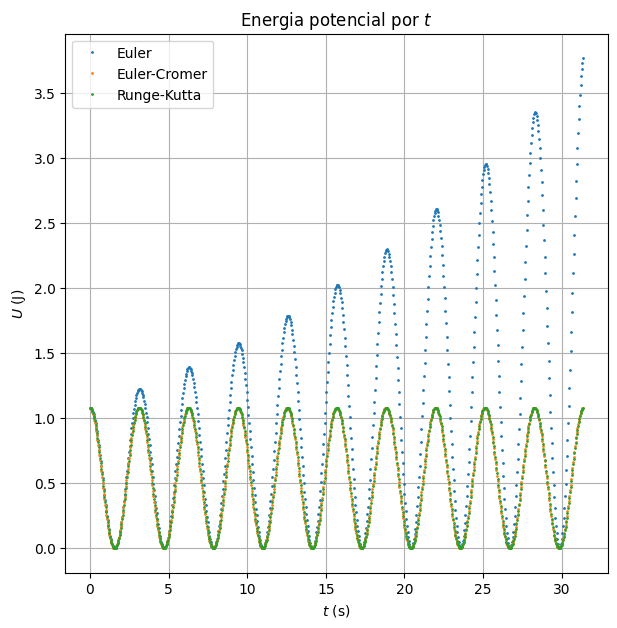

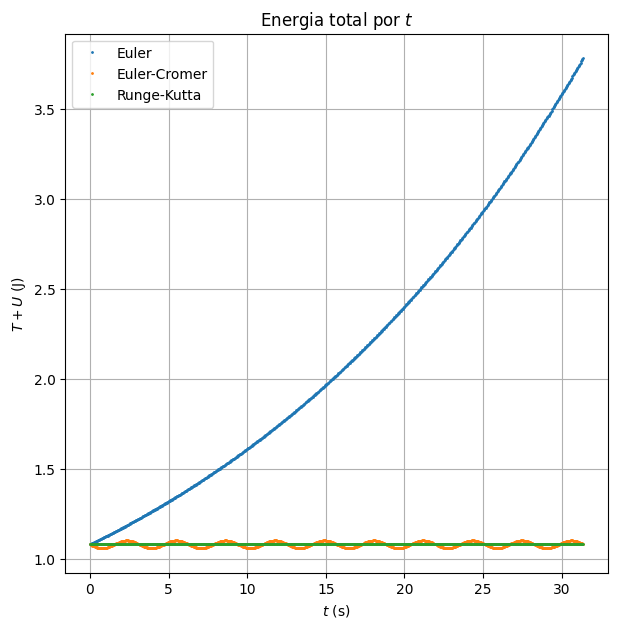

In [6]:
figc1, axc1 = plt.subplots()
axc1.plot(t_e1, T_e1, 'o', markersize=tamanho_mark, label='Euler')
axc1.plot(t_ec1, T_ec1, 'o', markersize=tamanho_mark, label='Euler-Cromer')
axc1.plot(t_rk1, T_rk1, 'o', markersize=tamanho_mark, label='Runge-Kutta')
# axc1.plot(t_1, T_1, '-', color='black', label='Solução analítica')
axc1.set_title('Energia cinética por $t$')
axc1.set_xlabel('$t$ (s)')
axc1.set_ylabel('$T$ (J)')
axc1.xaxis.grid()
axc1.yaxis.grid()
axc1.legend()
figc1.set_size_inches(tamanho_plot)

figc2, axc2 = plt.subplots()
axc2.plot(t_e1, U_e1, 'o', markersize=tamanho_mark, label='Euler')
axc2.plot(t_ec1, U_ec1, 'o', markersize=tamanho_mark, label='Euler-Cromer')
axc2.plot(t_rk1, U_rk1, 'o', markersize=tamanho_mark, label='Runge-Kutta')
# axc2.plot(t_1, U_1, '-', color='black', label='Solução analítica')
axc2.set_title('Energia potencial por $t$')
axc2.set_xlabel('$t$ (s)')
axc2.set_ylabel('$U$ (J)')
axc2.xaxis.grid()
axc2.yaxis.grid()
axc2.legend()
figc2.set_size_inches(tamanho_plot)

figc3, axc3 = plt.subplots()
axc3.plot(t_e1, E_e1, 'o', markersize=tamanho_mark, label='Euler')
axc3.plot(t_ec1, E_ec1, 'o', markersize=tamanho_mark, label='Euler-Cromer')
axc3.plot(t_rk1, E_rk1, 'o', markersize=tamanho_mark, label='Runge-Kutta')
# axc3.plot(t_1, E_1, '-', color='black', label='Solução analítica')
axc3.set_title('Energia total por $t$')
axc3.set_xlabel('$t$ (s)')
axc3.set_ylabel('$T + U$ (J)')
axc3.xaxis.grid()
axc3.yaxis.grid()
axc3.legend()
figc3.set_size_inches(tamanho_plot)

# axc3.set_xlim(18, 19)
# axc3.set_ylim(1.0, 1.5)


## Exercício 2
$$\frac{d^2 \theta}{dt^2} = - \frac{g}{l} \sin(\theta) - q \frac{d\theta}{dt} + \alpha \sin(\Omega_D t) = f(\theta, \omega, t)$$

In [7]:
g = 9.8
l = 9.8
Omega = np.sqrt(g / l)  # un.rad
Omega_D = 2 / 3
T_D = (2 * np.pi) / Omega_D
q = 0.5

t_2 = 50000
dt_2 = 0.01


In [8]:
def psfnanl_05(theta, omega, t, g=g, l=l, Omega_D=Omega_D, q=q, alfa=0.5):
    """Função matemática do pêndulo forçado, não amortecido e não-linear."""
    termo_nl = - (g / l) * np.sin(theta)
    termo_am = - q * omega
    termo_fr = alfa * np.sin(Omega_D * t)
    return termo_nl + termo_am + termo_fr


def psfnanl_12(theta, omega, t, g=g, l=l, Omega_D=Omega_D, q=q, alfa=1.2):
    """Função matemática do pêndulo forçado, não amortecido e não-linear."""
    termo_nl = - (g / l) * np.sin(theta)
    termo_am = - q * omega
    termo_fr = alfa * np.sin(Omega_D * t)
    return termo_nl + termo_am + termo_fr


theta_21, omega_21, t_21 = rungekutta(
    y_0=0.2,
    v_0=0,
    dt=dt_2,
    t_f=t_2,
    funcional=psfnanl_05
)

theta_22, omega_22, t_22 = rungekutta(
    y_0=0.2,
    v_0=0,
    dt=dt_2,
    t_f=t_2,
    funcional=psfnanl_12
)


### 2.(a)

In [9]:
# plt.xlim(0, 60)
# plt.plot(t_21, theta_21)
# # plt.plot(t_22, theta_22)
# array_dt = np.linspace(0.04, 0.005, 4)
# for dt in array_dt:
#     theta_T, omega_T, t_T = eulercromer(
#         y_0=0.2,
#         v_0=0,
#         dt=dt,
#         t_f=60,
#         funcional=psfnanl_12
#     )
#     plt.plot(t_T, theta_T)


### 2.(b)

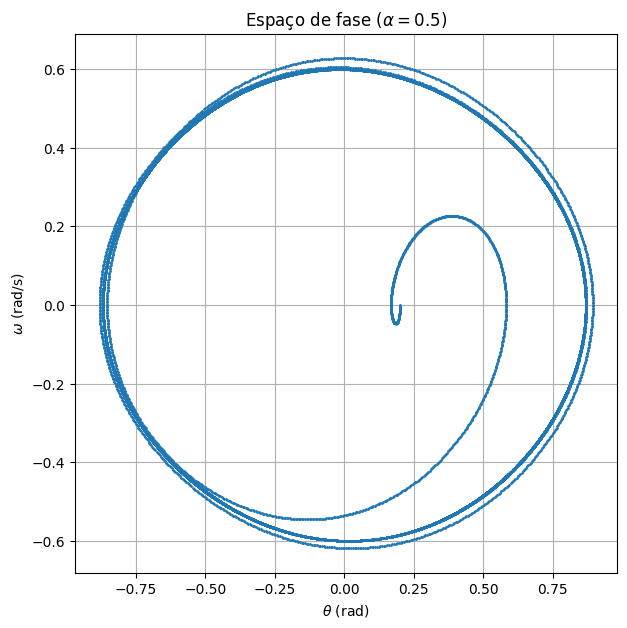

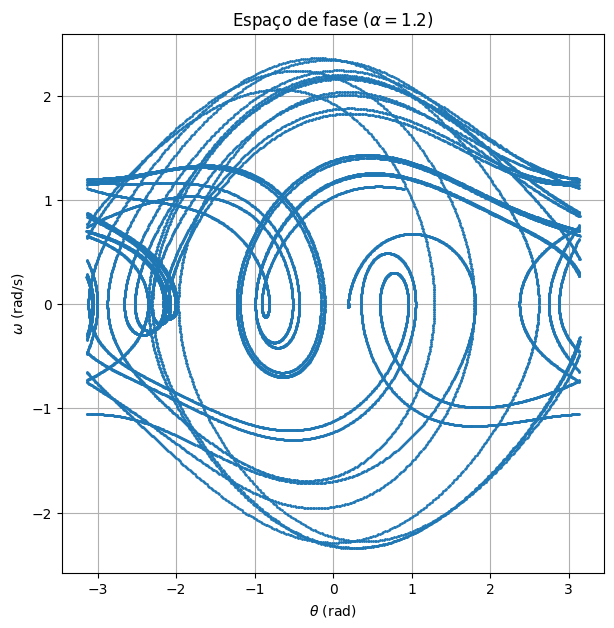

In [10]:
def lim_t(theta, omega, t, t_f=200):
    novo_omega = np.array([])
    novo_theta = np.array([])
    for i in range((np.size(t))):
        if t[i] < t_f:
            novo_omega = np.append(
                novo_omega, omega[i]
            )
            novo_theta = np.append(
                novo_theta, theta[i]
            )
    return novo_theta, novo_omega


theta_21_g, omega_21_g = lim_t(theta_21, omega_21, t_21)
fig2b1, ax2b1 = plt.subplots()
ax2b1.plot(theta_21_g, omega_21_g, 'o', markersize=tamanho_mark)
ax2b1.set_title('Espaço de fase ($\\alpha = 0.5$)')
ax2b1.set_xlabel('$\\theta$ (rad)')
ax2b1.set_ylabel('$\omega$ (rad/s)')
ax2b1.xaxis.grid()
ax2b1.yaxis.grid()
fig2b1.set_size_inches(tamanho_plot)

theta_22_g, omega_22_g = lim_t(theta_22, omega_22, t_22)
fig2b2, ax2b2 = plt.subplots()
ax2b2.plot(dominio_rad(theta_22_g), omega_22_g, 'o', markersize=tamanho_mark)
ax2b2.set_title('Espaço de fase ($\\alpha = 1.2$)')
ax2b2.set_xlabel('$\\theta$ (rad)')
ax2b2.set_ylabel('$\omega$ (rad/s)')
ax2b2.xaxis.grid()
ax2b2.yaxis.grid()
fig2b2.set_size_inches(tamanho_plot)


### 2.(c)

In [11]:
theta_21_p, omega_21_p = poincare(
    theta=theta_21,
    omega=omega_21,
    dt=dt_2,
    T=T_D
)

theta_22_p, omega_22_p = poincare(
    theta=theta_22,
    omega=omega_22,
    dt=dt_2,
    T=T_D
)


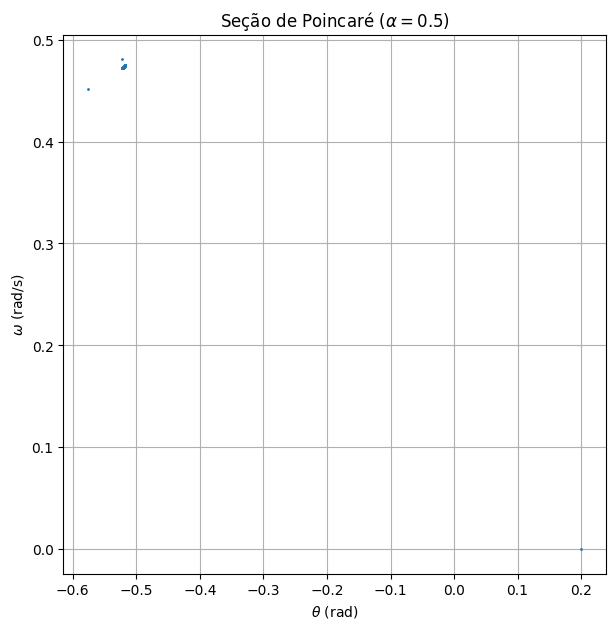

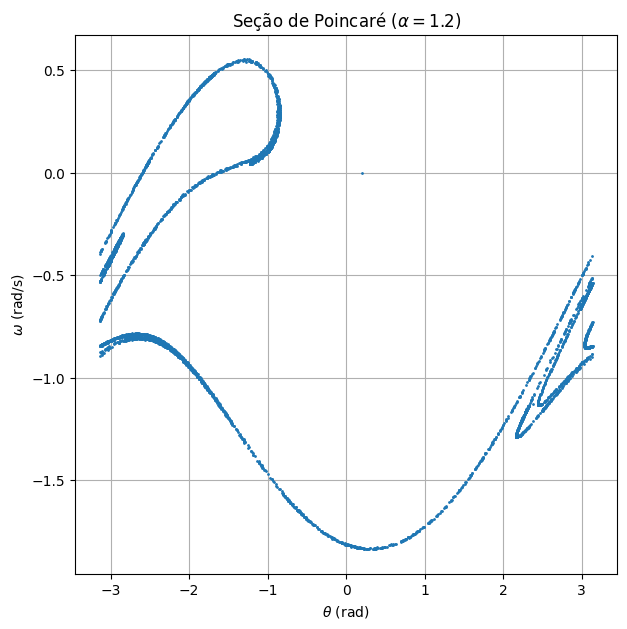

In [12]:
fig2c1, ax2c1 = plt.subplots()
ax2c1.plot(theta_21_p, omega_21_p, 'o', markersize=tamanho_mark)
ax2c1.set_title('Seção de Poincaré ($\\alpha = 0.5$)')
ax2c1.set_xlabel('$\\theta$ (rad)')
ax2c1.set_ylabel('$\omega$ (rad/s)')
ax2c1.xaxis.grid()
ax2c1.yaxis.grid()
fig2c1.set_size_inches(tamanho_plot)
fig2c1.savefig('lista01/fig2c1.pdf', format='pdf')

fig2c2, ax2c2 = plt.subplots()
ax2c2.plot(dominio_rad(theta_22_p), omega_22_p, 'o', markersize=tamanho_mark)
ax2c2.set_title('Seção de Poincaré ($\\alpha = 1.2$)')
ax2c2.set_xlabel('$\\theta$ (rad)')
ax2c2.set_ylabel('$\omega$ (rad/s)')
ax2c2.xaxis.grid()
ax2c2.yaxis.grid()
fig2c2.set_size_inches(tamanho_plot)
fig2c2.savefig('lista01/fig2c2.pdf', format='pdf')


### 2.(d)

In [13]:
Omega_D_d = 0.55 # (1 / 2) * Omega_D
T_D_d = (2 * np.pi) / Omega_D_d


def psfnanl_05(theta, omega, t, g=g, l=l, Omega_D=Omega_D_d, q=q, alfa=0.5):
    """Função matemática do pêndulo forçado, não amortecido e não-linear."""
    termo_nl = - (g / l) * np.sin(theta)
    termo_am = - q * omega
    termo_fr = alfa * np.sin(Omega_D * t)
    return termo_nl + termo_am + termo_fr


def psfnanl_12(theta, omega, t, g=g, l=l, Omega_D=Omega_D_d, q=q, alfa=1.2):
    """Função matemática do pêndulo forçado, não amortecido e não-linear."""
    termo_nl = - (g / l) * np.sin(theta)
    termo_am = - q * omega
    termo_fr = alfa * np.sin(Omega_D * t)
    return termo_nl + termo_am + termo_fr


theta_23, omega_23, t_23 = rungekutta(
    y_0=0.2,
    v_0=0,
    dt=dt_2,
    t_f=t_2,
    funcional=psfnanl_05
)

theta_24, omega_24, t_24 = rungekutta(
    y_0=0.2,
    v_0=0,
    dt=dt_2,
    t_f=t_2,
    funcional=psfnanl_12
)


In [14]:
theta_23_p, omega_23_p = poincare(
    theta=theta_23,
    omega=omega_23,
    dt=dt_2,
    T=T_D_d
)

theta_24_p, omega_24_p = poincare(
    theta=theta_24,
    omega=omega_24,
    dt=dt_2,
    T=T_D_d
)


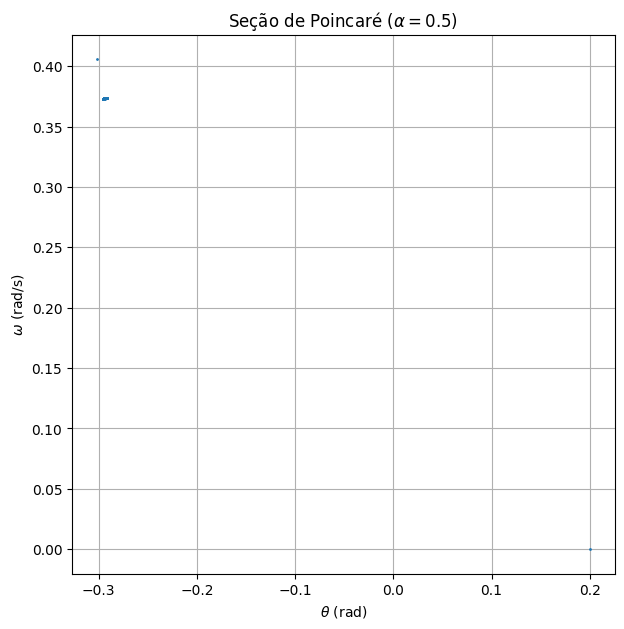

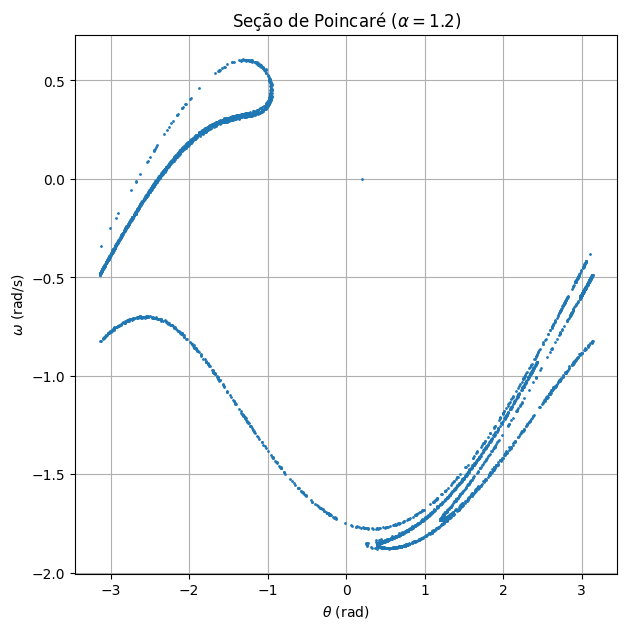

In [15]:
fig2d1, ax2d1 = plt.subplots()
ax2d1.plot(theta_23_p, omega_23_p, 'o', markersize=tamanho_mark)
ax2d1.set_title('Seção de Poincaré ($\\alpha = 0.5$)')
ax2d1.set_xlabel('$\\theta$ (rad)')
ax2d1.set_ylabel('$\omega$ (rad/s)')
ax2d1.xaxis.grid()
ax2d1.yaxis.grid()
fig2d1.set_size_inches(tamanho_plot)

fig2d2, ax2d2 = plt.subplots()
ax2d2.plot(dominio_rad(theta_24_p), omega_24_p, 'o', markersize=tamanho_mark)
ax2d2.set_title('Seção de Poincaré ($\\alpha = 1.2$)')
ax2d2.set_xlabel('$\\theta$ (rad)')
ax2d2.set_ylabel('$\omega$ (rad/s)')
ax2d2.xaxis.grid()
ax2d2.yaxis.grid()
fig2d2.set_size_inches(tamanho_plot)


## Exercício 3

$$\frac{d^2 x}{dt^2} = - k x^\alpha = f(x, t)$$

In [16]:
dt_3 = 0.001
t_3 = 15


def ohs_1(x, v, t, k=1, alfa=1):
    """Função matemática do oscilador anarmônico."""
    return - k * x**alfa


def ohs_3(x, v, t, k=1, alfa=3):
    """Função matemática do oscilador anarmônico."""
    return - k * x**alfa


x_31, v_31, t_31 = eulercromer(
    y_0=1,
    v_0=0,
    dt=dt_3,
    t_f=t_3,
    funcional=ohs_1
)

t_3an = np.linspace(0, t_31[-1], 10000)
x_3an = np.cos(t_3an)


### 3.(a)

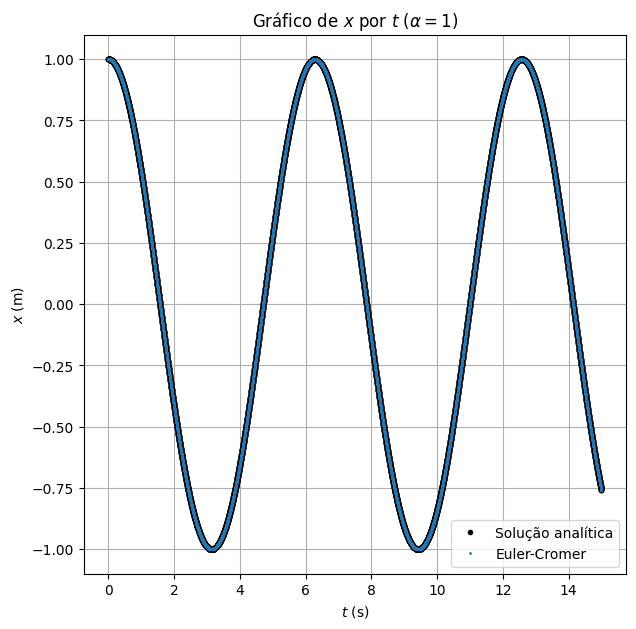

In [17]:
fig3a, ax3a = plt.subplots()
ax3a.plot(t_3an, x_3an, 'o',  markersize=3, color='black', label='Solução analítica')
ax3a.plot(t_31, x_31, 'o', markersize=tamanho_mark, label='Euler-Cromer')  # tamanho_mark
ax3a.set_title('Gráfico de $x$ por $t$ ($\\alpha = 1$)')
ax3a.set_xlabel('$t$ (s)')
ax3a.set_ylabel('$x$ (m)')
ax3a.xaxis.grid()
ax3a.yaxis.grid()
ax3a.legend()
fig3a.set_size_inches(tamanho_plot)


### 3.(b)

In [18]:
x_32, v_32, t_32 = eulercromer(
    y_0=0.2,
    v_0=0.0,
    dt=dt_3,
    t_f=t_3,
    funcional=ohs_3
)


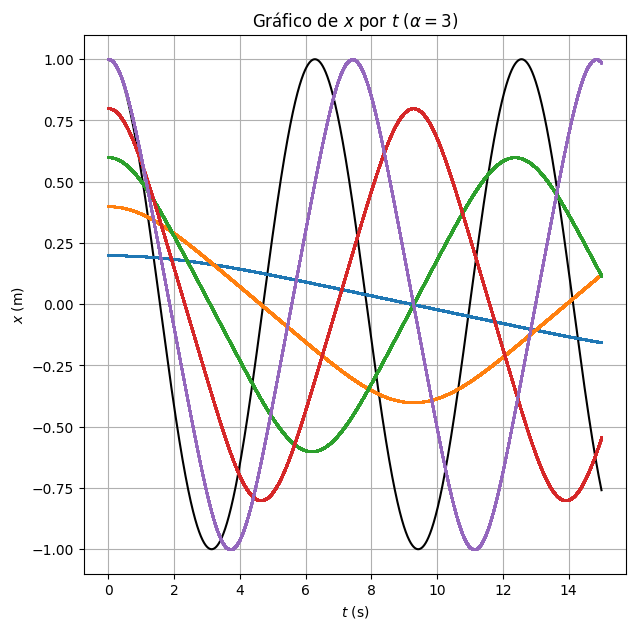

In [19]:
fig3b, ax3b = plt.subplots()
ax3b.set_title('Gráfico de $x$ por $t$ ($\\alpha = 3$)')
ax3b.set_xlabel('$t$ (s)')
ax3b.set_ylabel('$x$ (m)')
ax3b.xaxis.grid()
ax3b.yaxis.grid()
fig3b.set_size_inches(tamanho_plot)

ax3b.plot(t_3an, x_3an, '-', color='black', label='Solução analítica para $\\alpha = 1$')

for x_0 in np.linspace(0.2, 1, 5):
    x_3i, v_3i, t_3i = eulercromer(
        y_0=x_0,
        v_0=0.0,
        dt=dt_3,
        t_f=t_3,
        funcional=ohs_3
    )
    ax3b.plot(t_3i, x_3i, 'o', markersize=tamanho_mark,
              label='$x_0 = $' + str(x_0) + ' m')

# fig3b.legend()

# ax3b.legend()
# ax3b.plot(t_32, x_32)


In [20]:
print(np.linspace(0.2, 1, 5))

[0.2 0.4 0.6 0.8 1. ]


# Salvar imagens

In [21]:
# figa.savefig('lista01/fig1a.pdf', format='pdf')
# figb.savefig('lista01/fig1b.pdf', format='pdf')
# figc1.savefig('lista01/fig1c1.pdf', format='pdf')
# figc2.savefig('lista01/fig1c2.pdf', format='pdf')
# figc3.savefig('lista01/fig1c3.pdf', format='pdf')
# fig2b1.savefig('lista01/fig2b1.pdf', format='pdf')
# fig2b2.savefig('lista01/fig2b2.pdf', format='pdf')
# fig2d1.savefig('lista01/fig2d1.pdf', format='pdf')
# fig2d2.savefig('lista01/fig2d2.pdf', format='pdf')
# fig3a.savefig('lista01/fig3a.pdf', format='pdf')
# fig3b.savefig('lista01/fig3b.pdf', format='pdf')
